### TITANIC SURVIVAL PREDICTION 

The  most infamous  disaster  which  occurred over  a  century ago on  April 15, 1912, that  is well known  as sinking of “The Titanic”. The collision with  the iceberg ripped off many parts of the Titanic. Many classes of people of all ages and gender where present on that fateful night, but the bad luck was that there were only few life boats to rescue. The dead included a large  number  of  men whose  place  was  given  to  the  many women and children on board.  The men travelling in  second class were dead on the vine. In this project, We'll be trying to predict a classification- survival or deceased.


# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

## Import Libraries
Let's import some libraries to get started!

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### LET'S UNDERSTAND THE DATA

In [146]:
titanic_train = pd.read_csv('titanic_train.csv')

In [147]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

#### Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

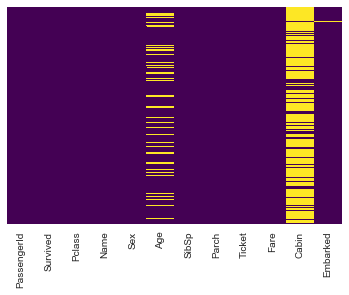

In [148]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! 

#### First, Let's see how many people survived and how many did not

0 = No, 1 = Yes

In [149]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

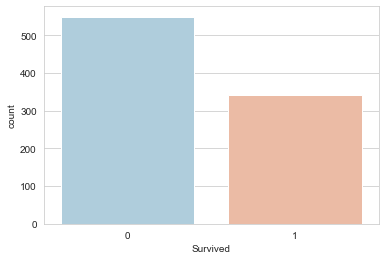

In [150]:
# Let's do a count plot to see the rate of survival
sns.set_style("whitegrid") 
sns.countplot(x="Survived", data=titanic_train, palette='RdBu_r')

#### Let's get the Pclass frequency

1 = 1st class, 

2 = 2nd class, 

3 = 3rd class

In [151]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

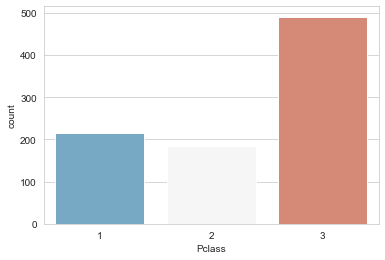

In [152]:
sns.set_style("whitegrid") 
sns.countplot(x="Pclass", data=titanic_train, palette='RdBu_r')

#### Let's get the Pclass frequency

In [153]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

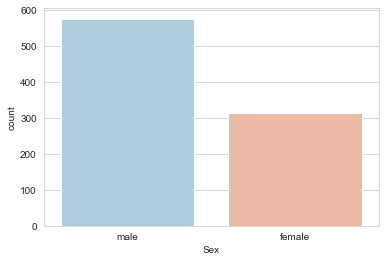

In [154]:
sns.set_style("whitegrid") 
sns.countplot(x="Sex", data=titanic_train, palette='RdBu_r')

We have gotten the frequency of 'Survived', 'Sex', 'Pclass'.  

#### How Let's see the distribution of these subsets by grouping them with the survival rate


#### How did sex affect the survival of a passenger ?

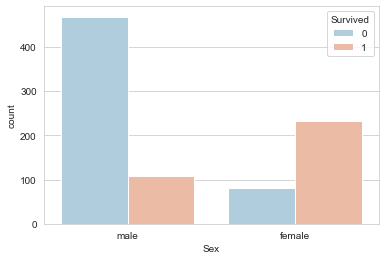

In [155]:
sns.set_style("whitegrid") 
sns.countplot(x="Sex", hue='Survived', data=titanic_train, palette='RdBu_r')

--> From the countplot, we can see that most men did not survive the attack. About 77% of men did not survive while over 66& of women survived the accident. 

#### How Pclass affects the survival of a passenger  ?

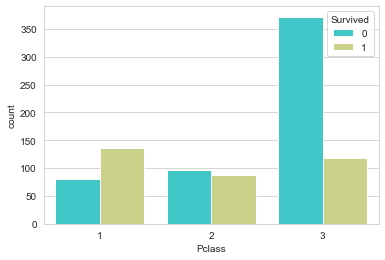

In [156]:
sns.set_style("whitegrid") 
sns.countplot(x="Pclass", hue='Survived', data=titanic_train, palette='rainbow')

--> The ticket class also affected the rate of survival. From the plot above, we can also see that about 70% of 3rd class passengers did not survive the accident while over 60% of first class passengers survived the accident

#### How number of sibblings('SibSp') affects the survival of a passenger  ?

In [157]:
titanic_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

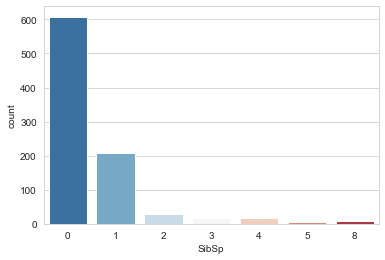

In [158]:
sns.set_style("whitegrid") 
sns.countplot(x="SibSp", data=titanic_train, palette='RdBu_r')

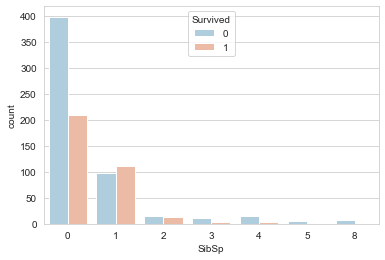

In [159]:
sns.set_style("whitegrid") 
sns.countplot(x="SibSp", data=titanic_train, hue='Survived', palette='RdBu_r')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class.

We are filling the missing values with the average of the other ages because it does not affect the result and It will prevent us from having to drop rows from other columns.

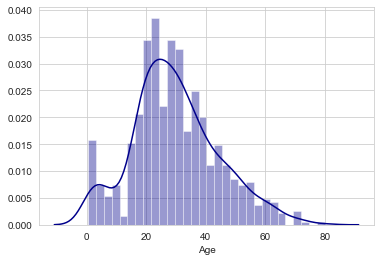

In [160]:
#The frequency and distribution of the ages
sns.distplot(titanic_train['Age'], bins=30, color='darkblue')

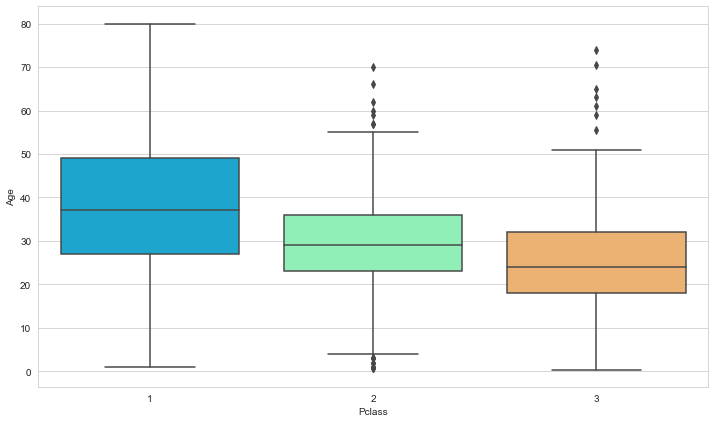

In [161]:
# boxplot of the ages relative to Pclass to determine the mean age per Pclass
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y='Age', data=titanic_train, palette='rainbow')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [162]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24;
    else:
        return Age

In [163]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(input_age,axis=1)

Now let's check the heatmap for null values 

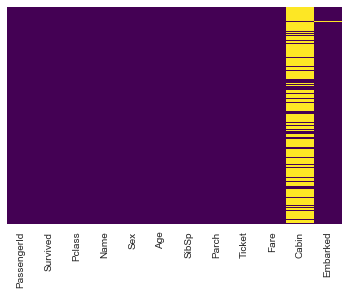

In [164]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Next, I will drop Cabin Column from dataset. And I am doing this because of 2 reasons:

1. The amount of missing data in the dataset is way above the amount of available data
2. The column refers to the cabn number and this has no effect on my analysis so therefore can be dropped

In [165]:
titanic_train.drop('Cabin', inplace=True, axis = 1)

Check new dataset

In [166]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Dealing with Categorical Features 

We'll need to convert categorical features (Embark and Sex) to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [167]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [168]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first = True)
embarked = pd.get_dummies(titanic_train['Embarked'], drop_first = True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


Drop all irrelevant columns since we already converted sex and embarked to dummy variables, we no longer need the columns

In [169]:
#we are also dropping the name and ticket as they do not have any effect on the prediction 
titanic_train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [170]:
titanic_train = pd.concat([titanic_train, sex, embarked], axis = 1)

In [171]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!


# Building a Logistic Regression model

For this project, I will be using logistic regression for the data modelling. Logistic regression is a machine learning model for classification.

Logistic Regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [174]:
##import train_test_split
from sklearn.model_selection import train_test_split

In [175]:
X = titanic_train.drop('Survived', axis = 'columns')

In [176]:
y = titanic_train['Survived']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

## CREATING AND TRAINING THE MODEL

In [178]:
from sklearn.linear_model import LogisticRegression

#assigned LnearRegression class to a variable lm
logmodel= LogisticRegression(max_iter=500)

In [182]:
#fit the dataset into the model
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
predictions = logmodel.predict(X_test)

In [184]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

## Evaluation

Evaluate the model to determine the performance and get the accuracy

In [185]:
#import classification_report
from sklearn.metrics import classification_report

In [186]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



The model has an accuracy of 78% which is tangibly above average. We can also test other machine learning models and see if we can get a higher accuracy. But for this project, 78% is Not so bad! 